# Customer Churn Analysis

Åsa Hellstrand - 2025/05/20

# Introduction

A fictional company is dealing with customer churn.
Some customers may be persuaded to stay with the right targeted offers.

The data comes from a public Kaggle competition, with a few modifications.
Data source: [Telco Customer Churn on Kaggle](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)

## Goal

The goal of this project is to build a model that predicts which customers are most likely to leave, so the company can reach out proactively. By exploring the data, I want to uncover the main factors driving churn and use these insights to make smarter retention decisions.

Here’s what I’ll do:

- Explore the key factors that have the biggest impact on churn.

- Build and compare different machine learning models to see which performs best in terms of accuracy and usefulness.

- Pick the best model and explain clearly why it’s the most suitable for real-world use.

- Present the results in a way that’s easy for anyone to understand, focusing on how the insights can guide concrete business actions.

# Data Preprocessing - Exploratory Data Analysis

## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Importing the dataset

##### Please note:
Due to data privacy and usage restrictions, the full dataset cannot be shared publicly.

A small random sample is included to illustrate the structure of the dataset.
As a result, the analysis outputs in the notebook may differ from the original project results

In [2]:
df = pd.read_csv('../data/churn_data_set.csv', delimiter=';')

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,"29,85","29,85",No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,"56,95","1889,5",No
2,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),"42,3","1840,75",No
3,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),"89,1","1949,4",No
4,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,"29,75","301,9",No


In [4]:
df.shape

(5374, 21)

## Taking care of missing data

Are there any missing data in the file?

In [5]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Column number 19 'Total charges' has 11 missing values, as the dataset has 5000+ entries, I feel it is safe to remove these without loosing a high percentage of the data. 11 entries corrispond to 0,2% of the total data entries.

In [6]:
df = df.dropna()

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Clean the data

In [8]:
# Replace the ',' with '.' in the numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.replace(',', '.'), errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'].str.replace(',', '.'), errors='coerce')

In [9]:
# Convert the numbers to from object to numeric data
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['MonthlyCharges'] = pd.to_numeric(df['MonthlyCharges'], errors='coerce')

In [10]:
# detect duplicates
print(df.duplicated().sum())

0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5363 entries, 0 to 5373
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5363 non-null   object 
 1   gender            5363 non-null   object 
 2   SeniorCitizen     5363 non-null   int64  
 3   Partner           5363 non-null   object 
 4   Dependents        5363 non-null   object 
 5   tenure            5363 non-null   int64  
 6   PhoneService      5363 non-null   object 
 7   MultipleLines     5363 non-null   object 
 8   InternetService   5363 non-null   object 
 9   OnlineSecurity    5363 non-null   object 
 10  OnlineBackup      5363 non-null   object 
 11  DeviceProtection  5363 non-null   object 
 12  TechSupport       5363 non-null   object 
 13  StreamingTV       5363 non-null   object 
 14  StreamingMovies   5363 non-null   object 
 15  Contract          5363 non-null   object 
 16  PaperlessBilling  5363 non-null   object 
 17  

In [12]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
3,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40,No
4,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90,No


## Feature dependencies

To visualize the possible dependencies between the churn and some of the independent variables, I decided to use boxplot from the Seaborn library.

Excerpt from the documentation:
"A box plot (or box-and-whisker plot) shows the distribution of quantitative data in a way that facilitates comparisons between variables or across levels of a categorical variable. The box shows the quartiles of the dataset while the whiskers extend to show the rest of the distribution, except for points that are determined to be “outliers” using a method that is a function of the inter-quartile range."

### Churn vs. the numerical variables

In [13]:
df_plot = df.copy()


In [14]:
# List of numerical features
numerical_features = [
    'tenure',
    'MonthlyCharges',
    'TotalCharges'
]

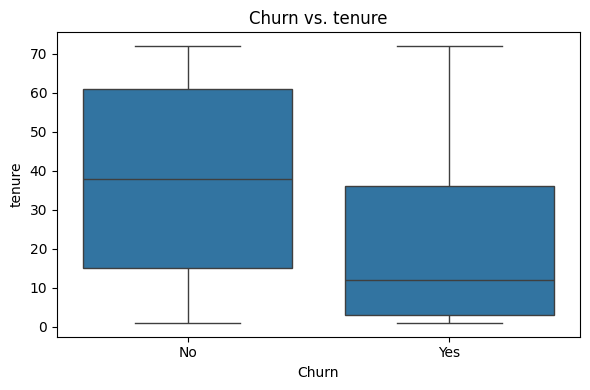

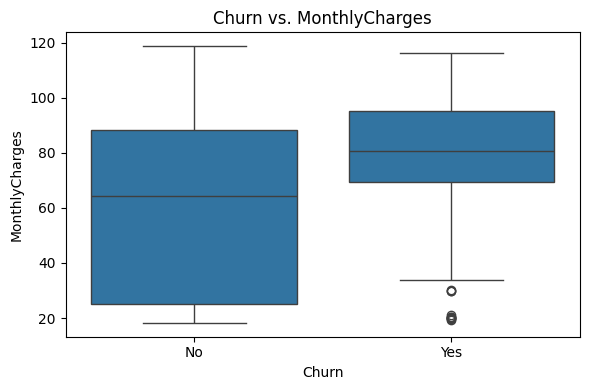

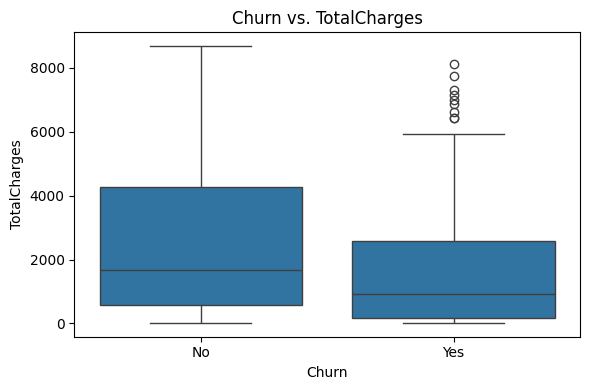

In [15]:
# Plot numerical features
for feature in numerical_features:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x='Churn', y=feature, data=df_plot)
    plt.title(f'Churn vs. {feature}')
    plt.tight_layout()
    plt.show()

#### Summary influence of numerical features
Lower tenure, higher monthly charges and lower total charges seem to give a higher risk of churn.

### Churn vs. the categorical variables

In [16]:
# List of categorical features
categorical_features = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'Contract',
    'PaperlessBilling',
    'PaymentMethod'
]


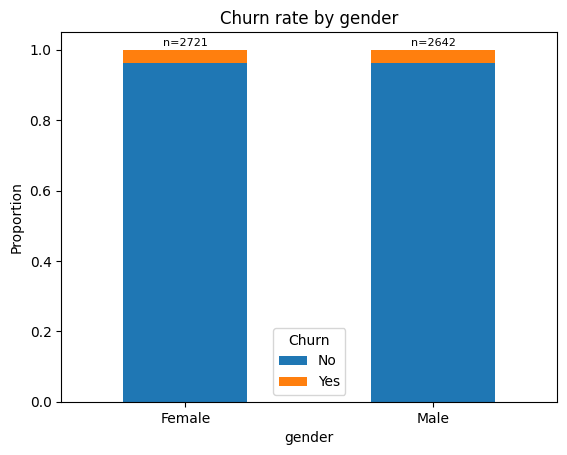

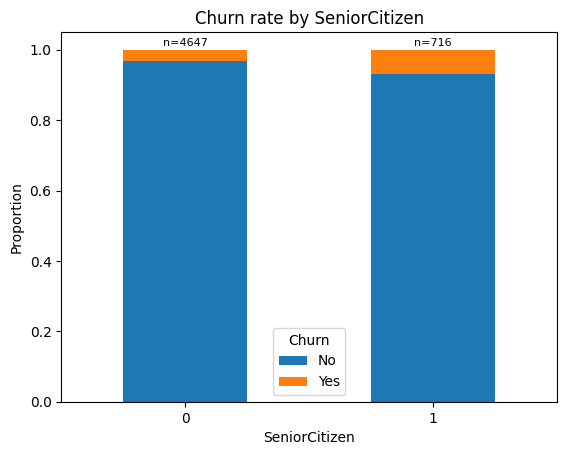

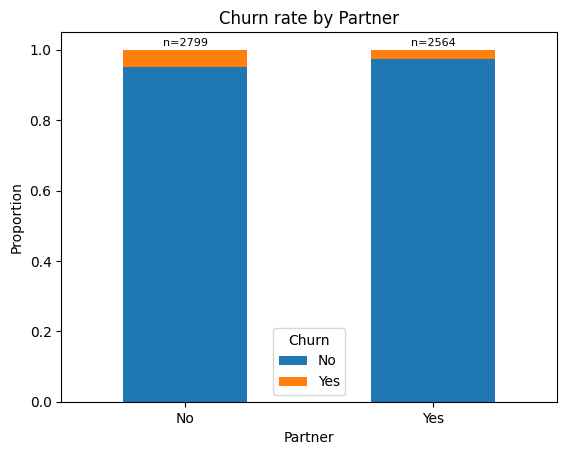

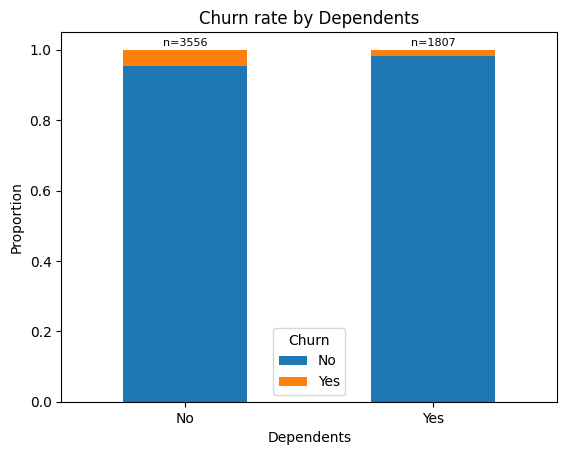

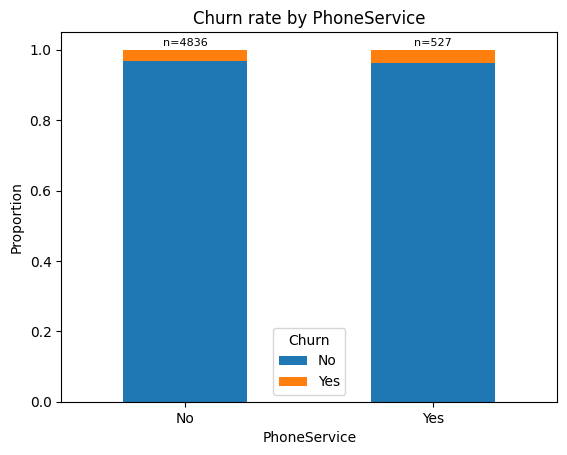

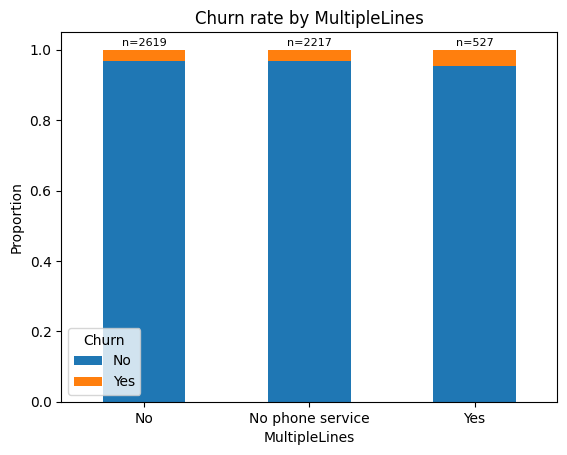

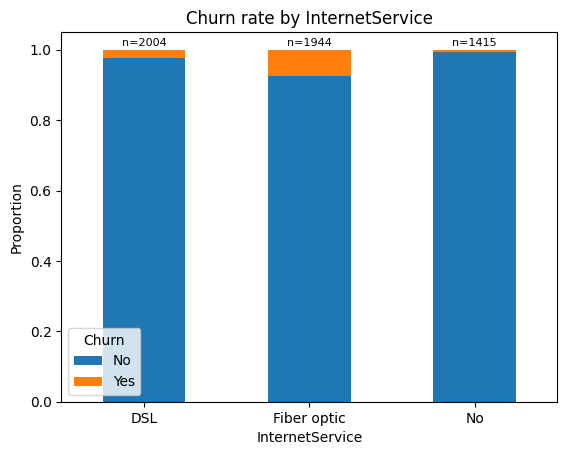

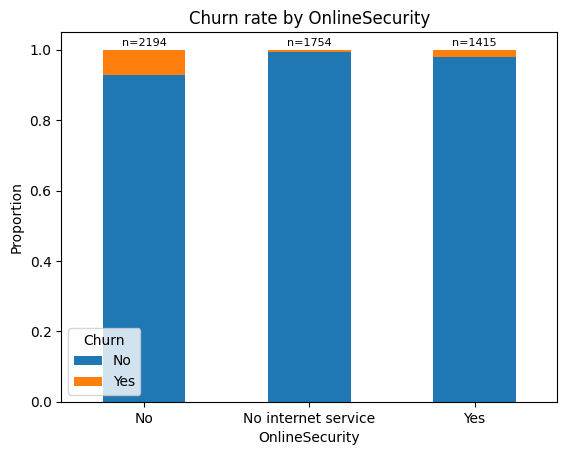

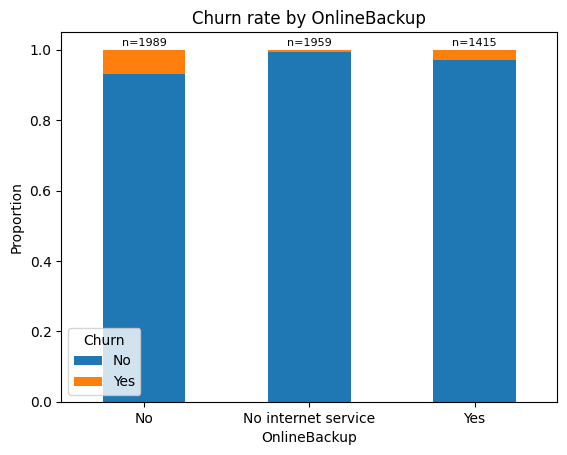

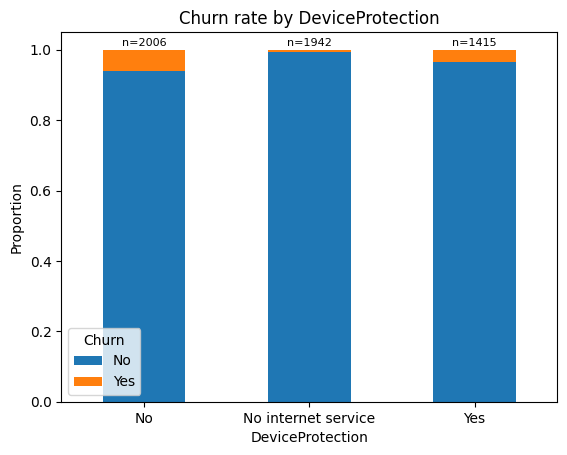

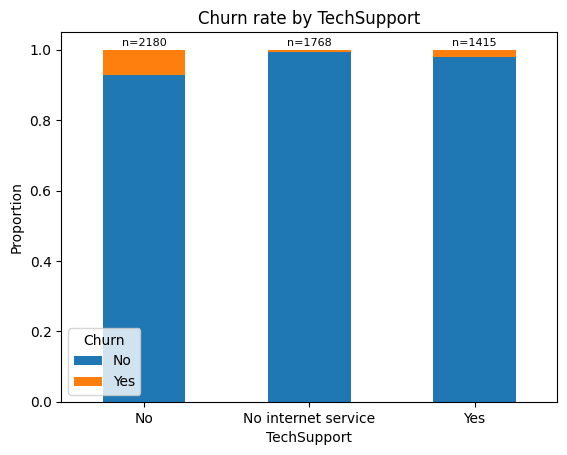

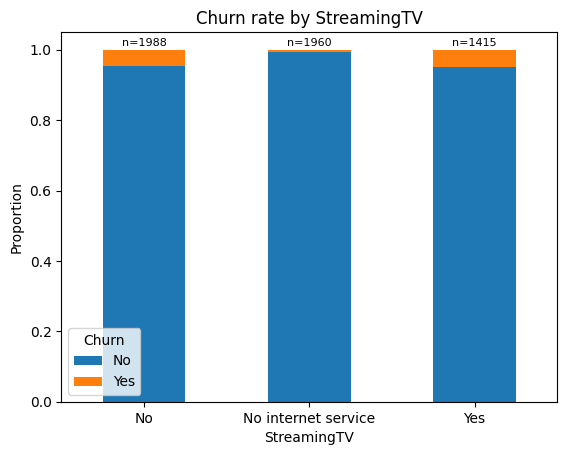

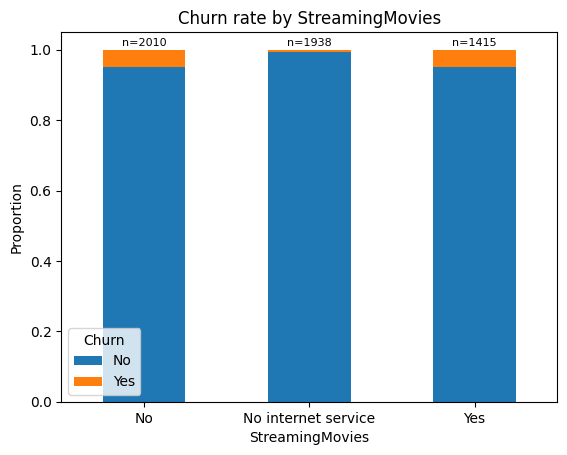

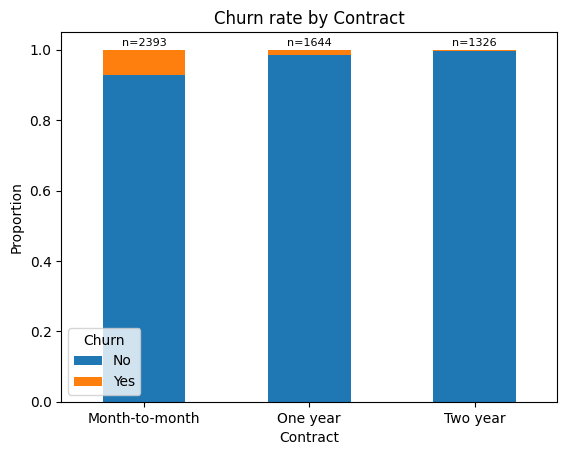

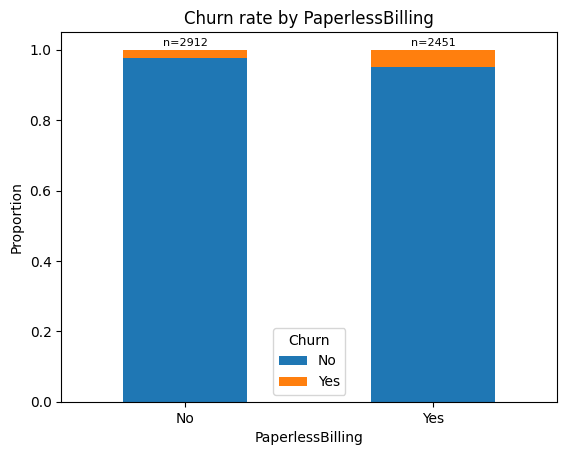

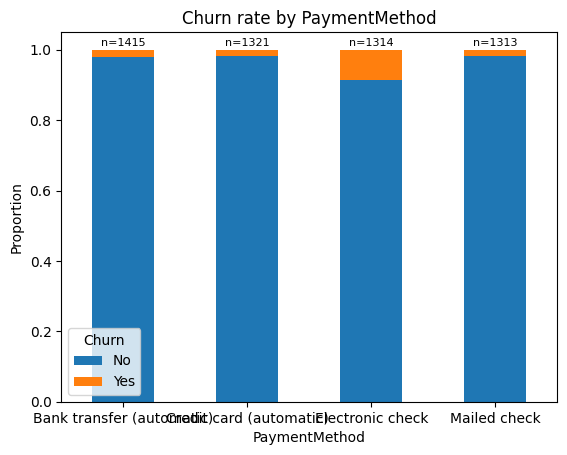

In [17]:
# Plot categorical features
for col in categorical_features:
    counts = df[col].value_counts()
    churn_rate = df.groupby(col)['Churn'].value_counts(normalize=True).unstack()
    churn_rate.plot(kind='bar', stacked=True)
    plt.title(f'Churn rate by {col}')
    plt.xticks(rotation=0)
    plt.ylabel('Proportion')
    for idx, val in enumerate(counts):
        plt.text(idx, 1.01, f'n={val}', ha='center', fontsize=8)
    plt.show()

In [18]:
def calculate_churn_rates(categorical_features):

    # Collect churn rates
    churn_summary = []

    for col in categorical_features:
        churn_rates = df.groupby(col)['Churn'].value_counts(normalize=True).unstack().fillna(0)
        if 'Yes' in churn_rates.columns:
            churn_col = churn_rates['Yes']
        else:
            churn_col = pd.Series(0, index=churn_rates.index)
        for category, rate in churn_col.items():
            churn_summary.append({
                'Feature': col,
                'Category': str(category),
                'Churn Rate (%)': round(rate * 100, 2)
            })
    
    # Create summary DataFrame
    churn_df = pd.DataFrame(churn_summary)
    churn_df = churn_df.sort_values(by='Churn Rate (%)', ascending=False).reset_index(drop=True)
    
    # Format the table
    from IPython.display import display
    display(churn_df.style.set_caption("Churn Rate by Feature and Category").format({"Churn Rate (%)": "{:.2f}"}))

calculate_churn_rates(categorical_features)

,Feature,Category,Churn Rate (%)
0,PaymentMethod,Electronic check,8.55
1,InternetService,Fiber optic,7.46
2,Contract,Month-to-month,7.23
3,OnlineSecurity,No,7.20
4,TechSupport,No,7.06
5,SeniorCitizen,1,6.98
6,OnlineBackup,No,6.79
7,DeviceProtection,No,6.13
8,StreamingTV,Yes,4.98
9,PaperlessBilling,Yes,4.95


#### Summary influence of categorical features

- Gender appears to have no significant impact on customer churn.

- SeniorCitizen status shows a positive correlation with churn — older customers are more likely to leave.

- Partner and Dependents have a slightly negative correlation with churn — customers without a partner or children are somewhat more likely to churn.

- Contract type is a strong indicator: customers on month-to-month contracts are much more likely to churn compared to those on longer-term contracts.

- Internet Service: customers with Fiber optic is more likely to churn.

- Payment Method matters: customers who use Electronic Check are more likely to churn than those using other payment options.

- Paperless Billing is also associated with higher churn — those using it are more likely to leave the service.

- At the bottom of the churn rate table, we observe the 'No internet service' category across several features. This suggests that customers without internet service are generally less likely to churn.

## Separate the independent and dependent variables

In [19]:
X = df.iloc[:,1:-1] #we are not interested in including the first customerID variable, we are keeping it as a DataFrame during preprocessing.
y = df.iloc[:,-1]

In [20]:
X

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50
2,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
3,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.40
4,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5369,Female,0,Yes,No,54,Yes,Yes,DSL,No,No,No,No,Yes,Yes,One year,Yes,Credit card (automatic),70.15,3715.65
5370,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,68.95,119.75
5371,Male,0,Yes,No,42,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Bank transfer (automatic),95.25,3959.35
5372,Male,0,No,No,35,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Credit card (automatic),75.35,2636.05


In [21]:
#y

## Encoding categorical data

### Encoding the Independent Variables

In [22]:
product_columns = [
    'PhoneService',
    'MultipleLines',
    'InternetService',       
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies'
]

In [23]:
# check how many values we have in each column
unique_counts = X.nunique()
print(unique_counts)

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1477
TotalCharges        5145
dtype: int64


In [24]:
# Convert to 1 if the service is active, otherwise 0
for col in product_columns:
    X[col] = X[col].apply(lambda x: 1 if x in ['Yes', 'DSL', 'Fiber optic'] else 0)

In [25]:
# check what values we have in each column
for col in X.columns:
    print(f"Column: {col}")
    print(X[col].unique())
    print("-" * 30)

Column: gender
['Female' 'Male']
------------------------------
Column: SeniorCitizen
[0 1]
------------------------------
Column: Partner
['Yes' 'No']
------------------------------
Column: Dependents
['No' 'Yes']
------------------------------
Column: tenure
[ 1 34 45 22 10 62 13 16 58 25 69 52 71 21 12 49 30 72  2 27 46 70 17 63
 43 60 66 47 18  3 31 50 64 56  8 11 42  9 35 48 29 65 38  5 32 36 41  6
  7  4 33 67 23 57 61 15 14 53 20 40 59 24 44 54 51 19 68 28 37 55 26 39]
------------------------------
Column: PhoneService
[0 1]
------------------------------
Column: MultipleLines
[0 1]
------------------------------
Column: InternetService
[1 0]
------------------------------
Column: OnlineSecurity
[0 1]
------------------------------
Column: OnlineBackup
[1 0]
------------------------------
Column: DeviceProtection
[0 1]
------------------------------
Column: TechSupport
[0 1]
------------------------------
Column: StreamingTV
[0 1]
------------------------------
Column: Streamin

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5363 entries, 0 to 5373
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5363 non-null   object 
 1   SeniorCitizen     5363 non-null   int64  
 2   Partner           5363 non-null   object 
 3   Dependents        5363 non-null   object 
 4   tenure            5363 non-null   int64  
 5   PhoneService      5363 non-null   int64  
 6   MultipleLines     5363 non-null   int64  
 7   InternetService   5363 non-null   int64  
 8   OnlineSecurity    5363 non-null   int64  
 9   OnlineBackup      5363 non-null   int64  
 10  DeviceProtection  5363 non-null   int64  
 11  TechSupport       5363 non-null   int64  
 12  StreamingTV       5363 non-null   int64  
 13  StreamingMovies   5363 non-null   int64  
 14  Contract          5363 non-null   object 
 15  PaperlessBilling  5363 non-null   object 
 16  PaymentMethod     5363 non-null   object 
 17  

In [27]:
# use LabelEncoder only on all columns with binary values that are 'object'
from sklearn.preprocessing import LabelEncoder
count = 0

# Loop through each column in X
for col in X.columns:
    if X[col].nunique() == 2 and X[col].dtype == 'object':
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        count += 1

print(count)

4


In [28]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Identify columns with 3 or 4 unique values
cols_to_encode = [col for col in X.columns if X[col].nunique() in [3,4]]

print(cols_to_encode)


['Contract', 'PaymentMethod']


In [29]:
# Create a ColumnTransformer to encode just those columns
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(drop='first'), cols_to_encode)],
    remainder='passthrough'
)

# Apply the transformer once to the whole DataFrame
X = ct.fit_transform(X)

#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(),[0])], remainder='passthrough')


In [30]:
X


array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.98500e+01, 2.98500e+01],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.69500e+01, 1.88950e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        4.23000e+01, 1.84075e+03],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        9.52500e+01, 3.95935e+03],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        7.53500e+01, 2.63605e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.37500e+01, 2.47250e+02]], shape=(5363, 22))

### Encoding the Dependent Variable

In [31]:
le = LabelEncoder()

In [32]:
y = le.fit_transform(y)

In [33]:
y

array([0, 0, 0, ..., 1, 1, 1], shape=(5363,))

## Dataset balance check

Is the dataset imbalanced? I did the following check:

In [34]:
# Convert NumPy array to pandas Series
y_series = pd.Series(y)

# Use value_counts
print(y_series.value_counts())
print(y_series.value_counts(normalize=True))

0    5163
1     200
Name: count, dtype: int64
0    0.962707
1    0.037293
Name: proportion, dtype: float64


### Visualize the imbalance

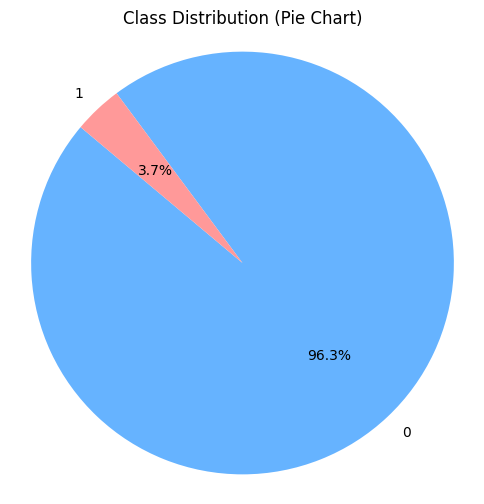

In [35]:
# Get value counts
class_counts = y_series.value_counts()
labels = class_counts.index
sizes = class_counts.values

# Pie chart
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=["#66b3ff", "#ff9999"])
plt.title("Class Distribution (Pie Chart)")
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle
plt.show()

### Class Distribution

- No Churn: 96.3% of customers did not leave
- Churn: 3.7% of customers did leave

This confirms that the dataset is highly imbalanced, which can bias standard models toward the majority class and reduce their ability to detect churners.

To address this imbalance, I will apply SMOTE (Synthetic Minority Over-sampling Technique) on the training set only, which should help the model better learn patterns associated with churn and improve recall and overall predictive performance.

## Splitting the dataset into the Training set and Test set

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [38]:
X_train

array([[0.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.92000e+01, 4.59035e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        4.07500e+01, 3.59400e+02],
       [0.00000e+00, 1.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        8.54500e+01, 6.22750e+03],
       ...,
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        9.06500e+01, 5.93100e+03],
       [1.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        1.93000e+01, 4.86200e+02],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.03850e+02, 2.21500e+03]], shape=(4290, 22))

## Feature Scaling

In [39]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [40]:
X_train

array([[-0.57788859,  1.49917969,  1.76329107, ...,  0.91029913,
         0.55245479,  0.88148963],
       [-0.57788859, -0.66703145, -0.56712134, ..., -1.09854   ,
        -0.69036985, -0.93670397],
       [-0.57788859,  1.49917969,  1.76329107, ...,  0.91029913,
         0.7544744 ,  1.58503272],
       ...,
       [-0.57788859, -0.66703145, -0.56712134, ...,  0.91029913,
         0.92255471,  1.45761585],
       [ 1.73043735, -0.66703145,  1.76329107, ..., -1.09854   ,
        -1.38370116, -0.88221338],
       [-0.57788859, -0.66703145, -0.56712134, ..., -1.09854   ,
         1.34922013, -0.13928494]], shape=(4290, 22))

In [41]:
X_test

array([[-0.57788859,  1.49917969, -0.56712134, ...,  0.91029913,
         0.93871628,  1.76139658],
       [-0.57788859, -0.66703145,  1.76329107, ..., -1.09854   ,
        -1.37885268, -0.99140942],
       [ 1.73043735, -0.66703145,  1.76329107, ...,  0.91029913,
        -1.35784265, -0.81418609],
       ...,
       [ 1.73043735, -0.66703145,  1.76329107, ..., -1.09854   ,
        -1.35137802, -0.89039986],
       [-0.57788859, -0.66703145, -0.56712134, ..., -1.09854   ,
         0.26154655, -0.64143203],
       [-0.57788859,  1.49917969, -0.56712134, ..., -1.09854   ,
        -1.22370162, -0.62791681]], shape=(1073, 22))

## Applying SMOTE (Synthetic Minority Over-sampling Technique) 

A powerful way to balance the dataset by synthetically generating new examples of the minority class (e.g., churned customers)

Important: Split before applying SMOTE to avoid data leakage

In [42]:
#!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", pd.Series(y_train).value_counts())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts())

Before SMOTE: 0    4130
1     160
Name: count, dtype: int64
After SMOTE: 0    4130
1    4130
Name: count, dtype: int64


In [43]:
#X_train_resampled

# Model Training and Evaluation (Confusion Matrix & Metrics)

The following code trains five classification models on the preprocessed dataset and evaluates them on the test set using thresholds from 0.1 to 0.7.  
For each threshold, it generates predictions, plots confusion matrices, and calculates metrics: Accuracy, Precision, Recall, F1-score, and ROC AUC.  
ROC AUC is computed once per model using predicted probabilities.  
Results are stored to compare model performance across thresholds.

In [44]:
# Import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    roc_auc_score, 
    roc_curve, 
    accuracy_score, 
    precision_score, 
    recall_score, 
    f1_score
)


=== Logistic Regression ===

--- Threshold: 0.1 ---


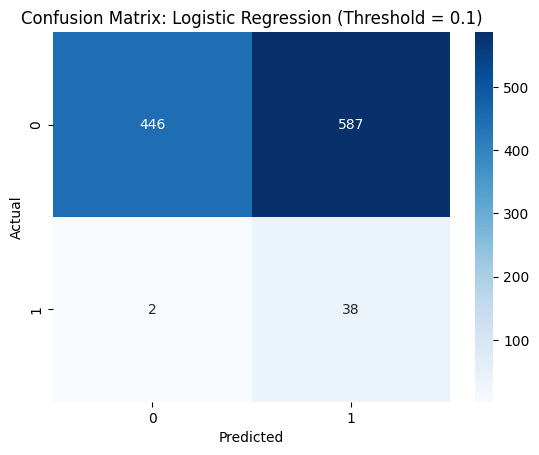


--- Threshold: 0.2 ---


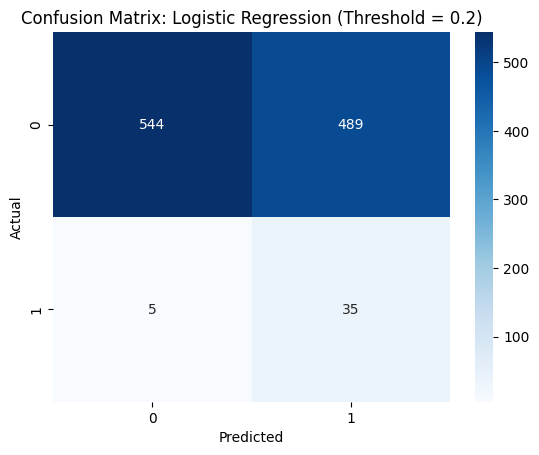


--- Threshold: 0.3 ---


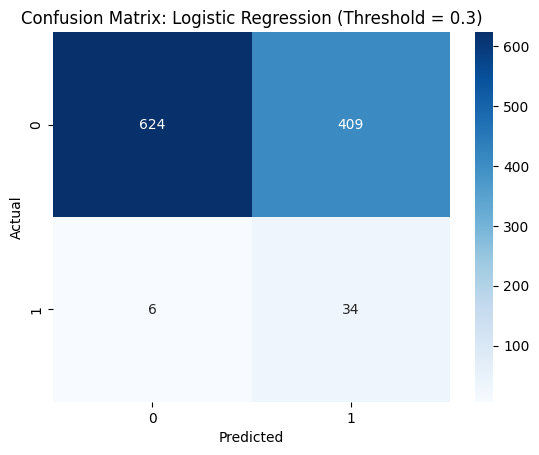


--- Threshold: 0.4 ---


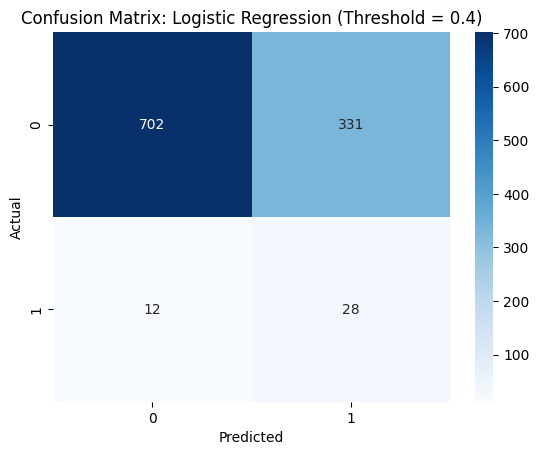


--- Threshold: 0.5 ---


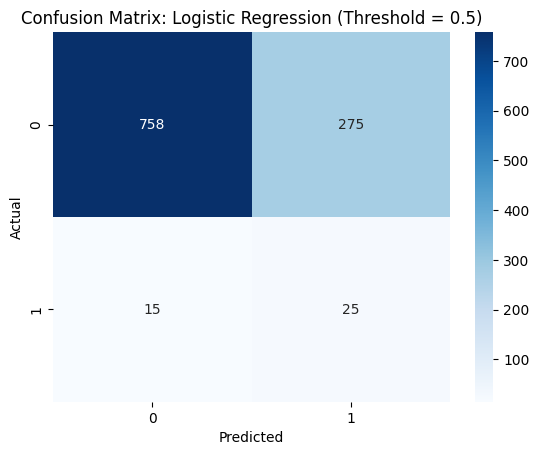


--- Threshold: 0.6 ---


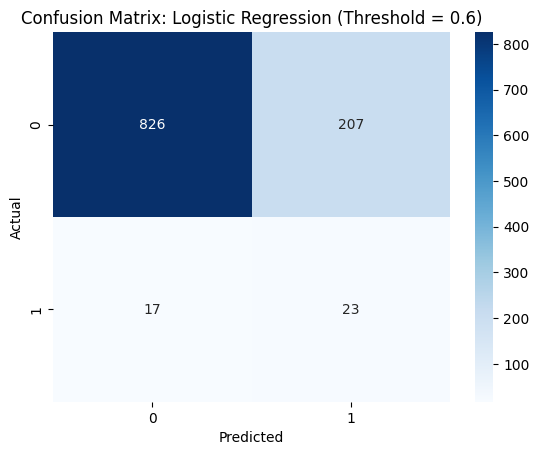


--- Threshold: 0.7 ---


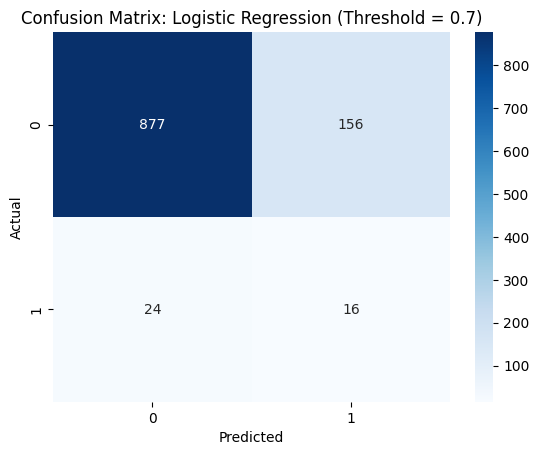


=== Random Forest ===

--- Threshold: 0.1 ---


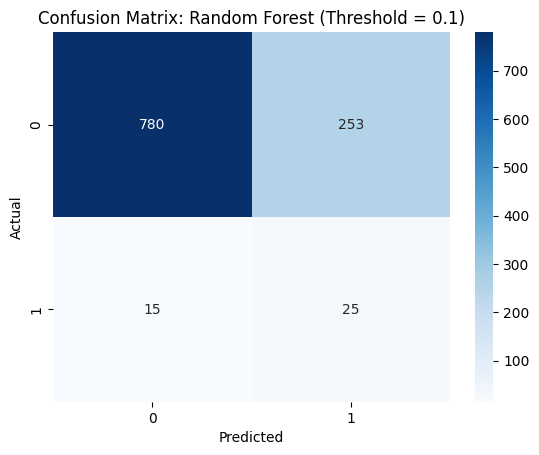


--- Threshold: 0.2 ---


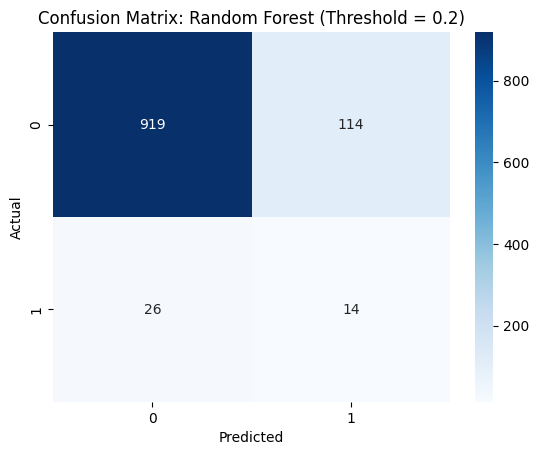


--- Threshold: 0.3 ---


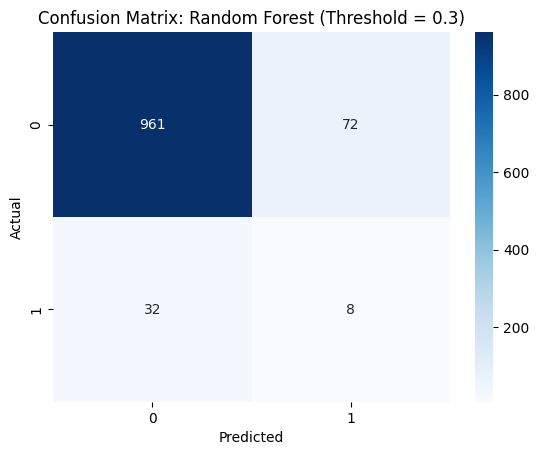


--- Threshold: 0.4 ---


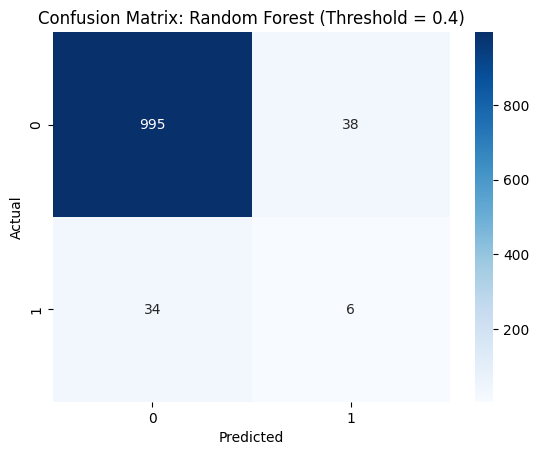


--- Threshold: 0.5 ---


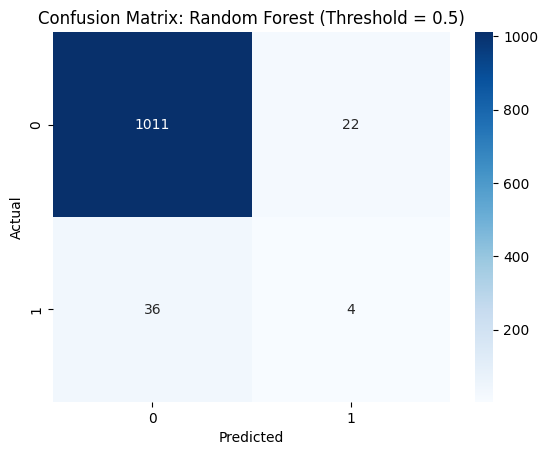


--- Threshold: 0.6 ---


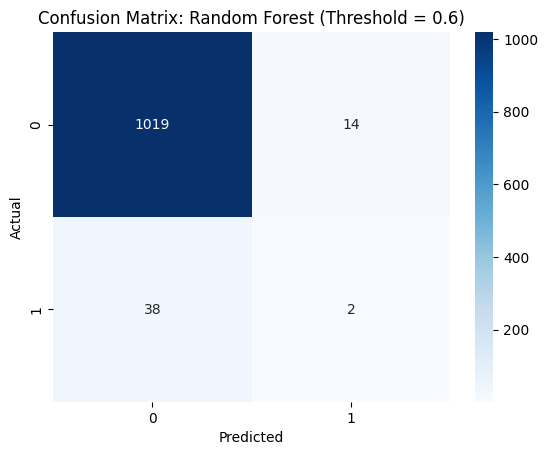


--- Threshold: 0.7 ---


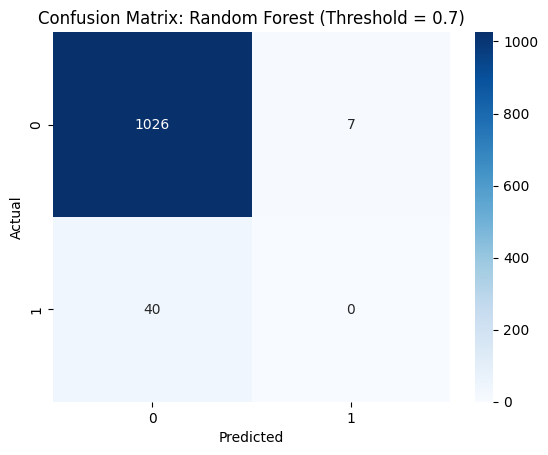


=== SVM ===

--- Threshold: 0.1 ---


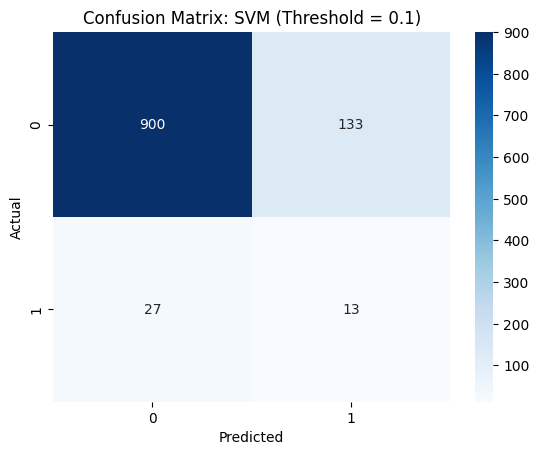


--- Threshold: 0.2 ---


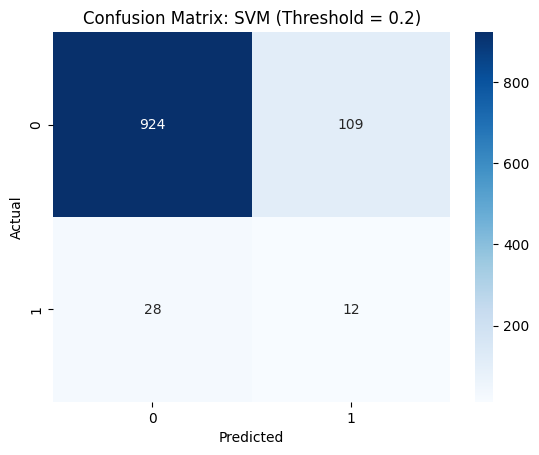


--- Threshold: 0.3 ---


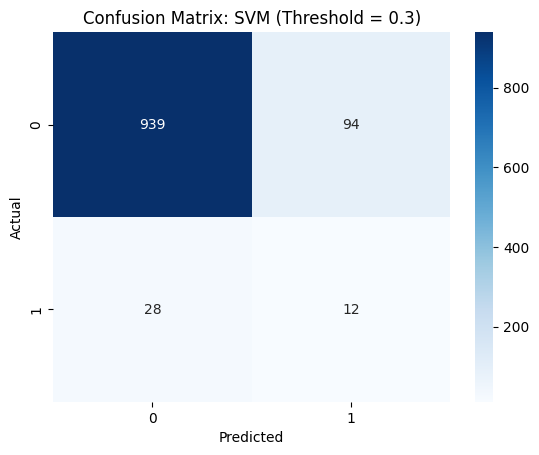


--- Threshold: 0.4 ---


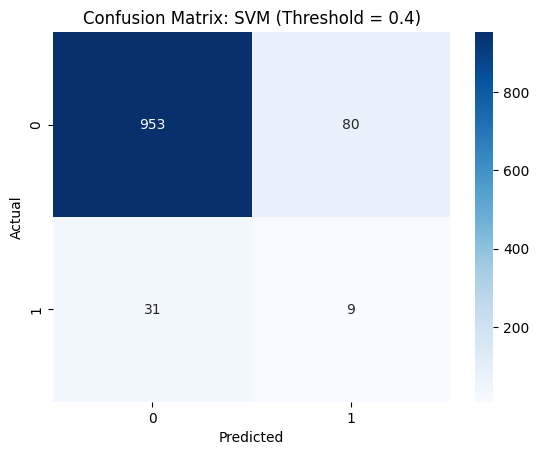


--- Threshold: 0.5 ---


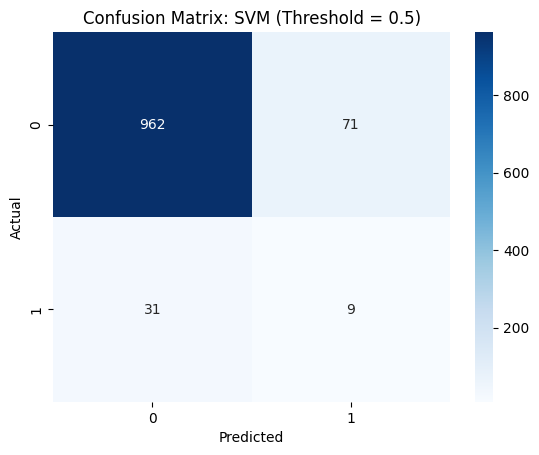


--- Threshold: 0.6 ---


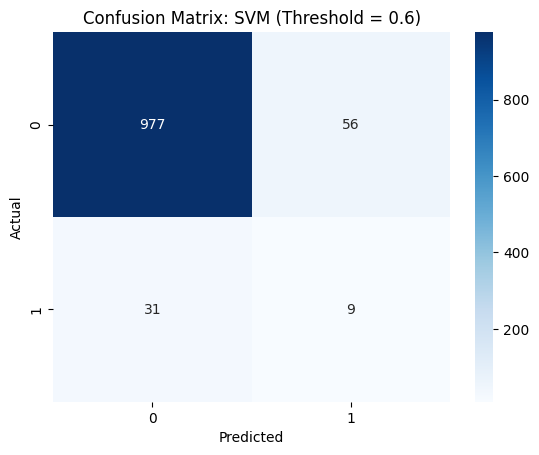


--- Threshold: 0.7 ---


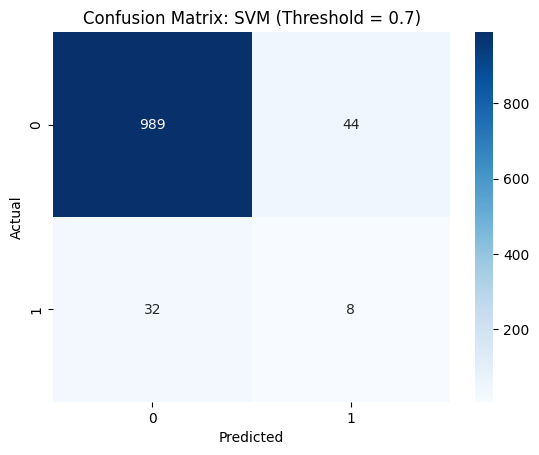


=== K-Nearest Neighbors ===

--- Threshold: 0.1 ---


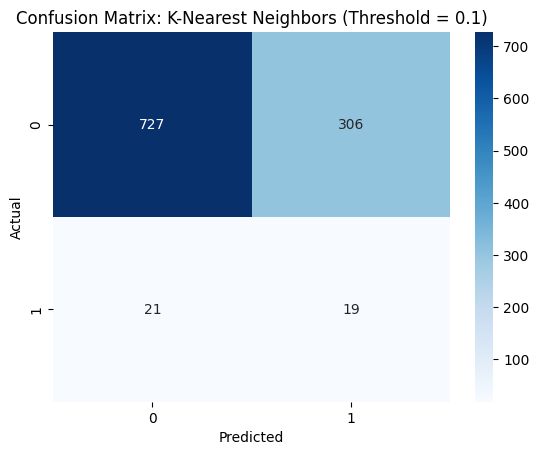


--- Threshold: 0.2 ---


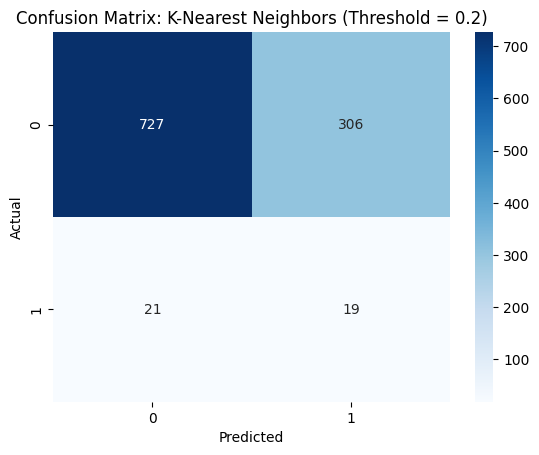


--- Threshold: 0.3 ---


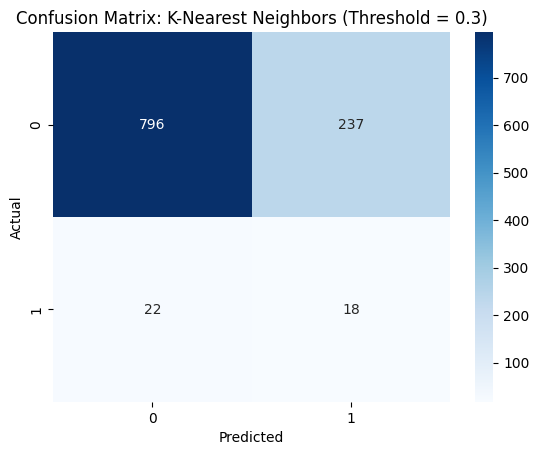


--- Threshold: 0.4 ---


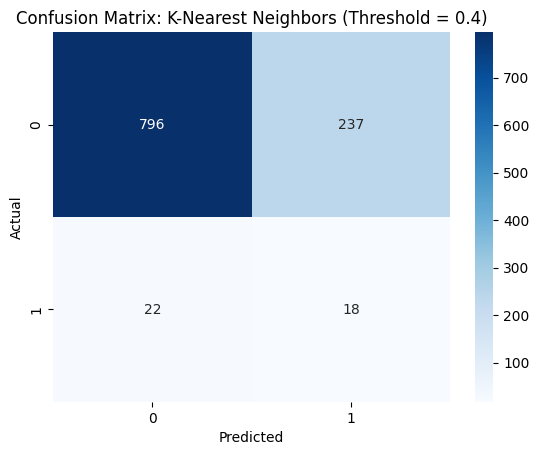


--- Threshold: 0.5 ---


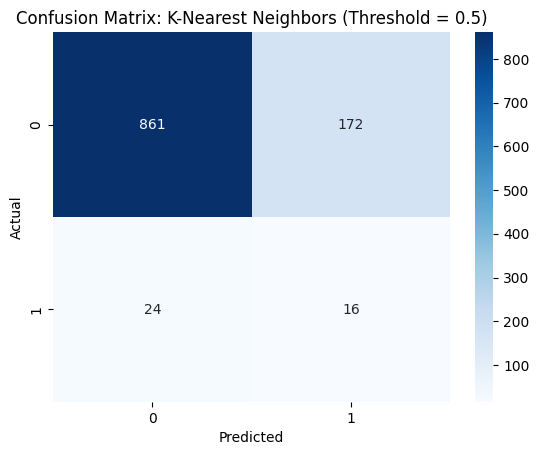


--- Threshold: 0.6 ---


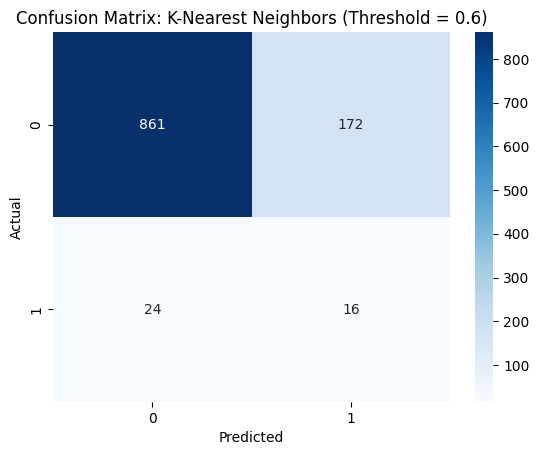


--- Threshold: 0.7 ---


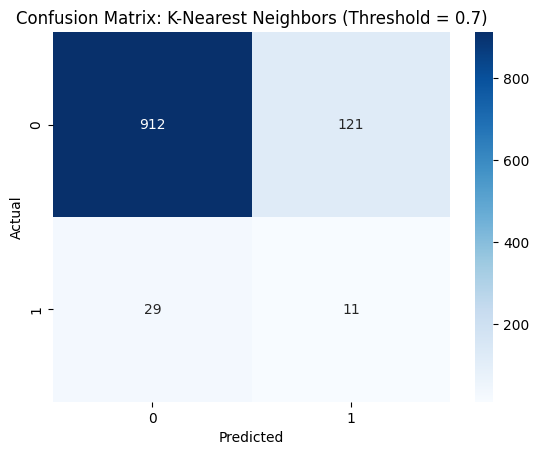


=== XGBoost ===

--- Threshold: 0.1 ---


C:\Users\turbo\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:42:07] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


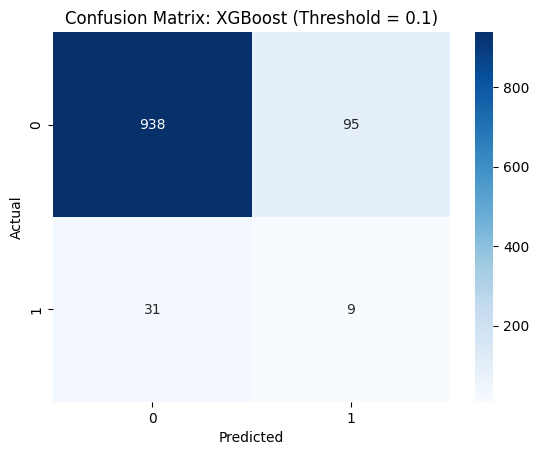


--- Threshold: 0.2 ---


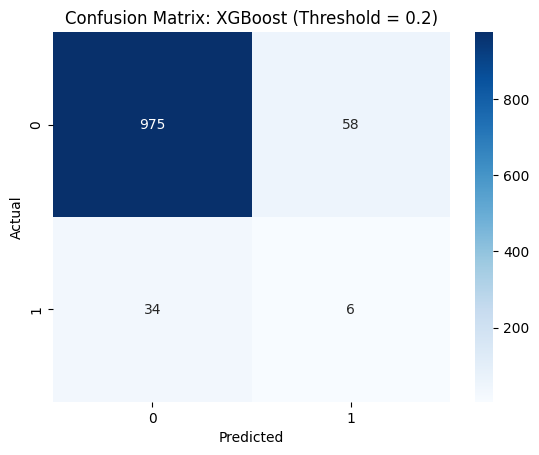


--- Threshold: 0.3 ---


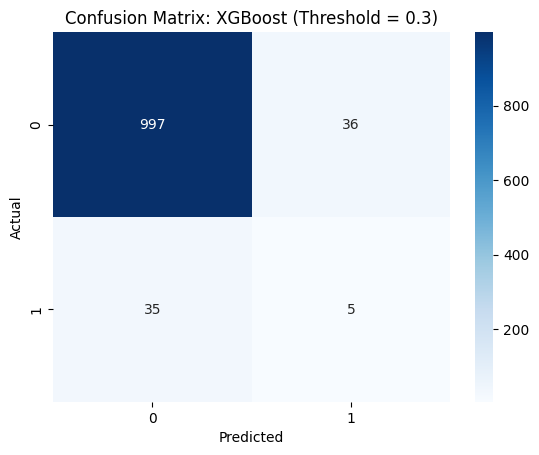


--- Threshold: 0.4 ---


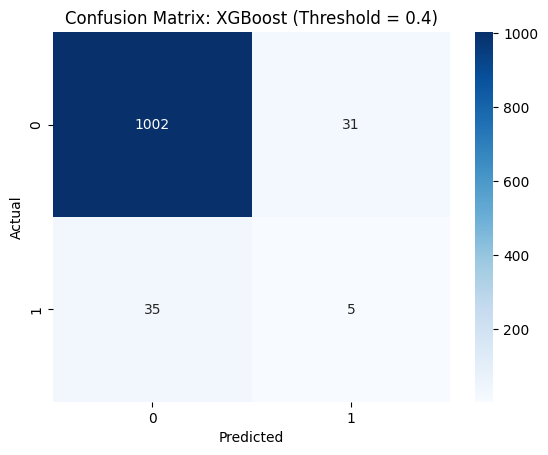


--- Threshold: 0.5 ---


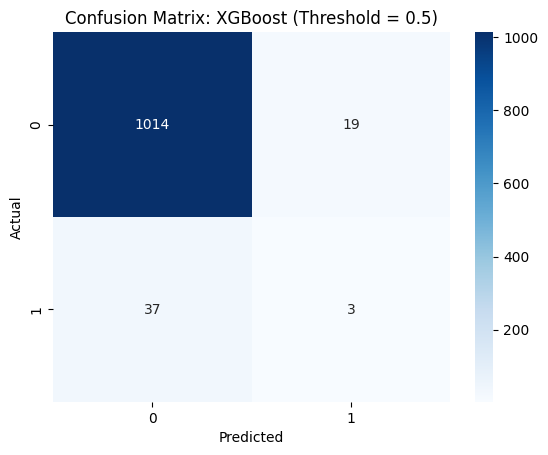


--- Threshold: 0.6 ---


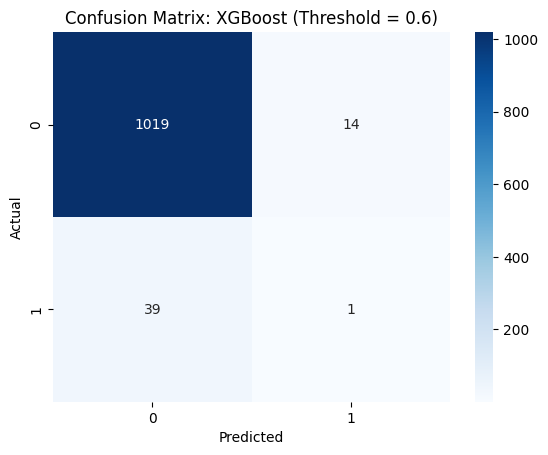


--- Threshold: 0.7 ---


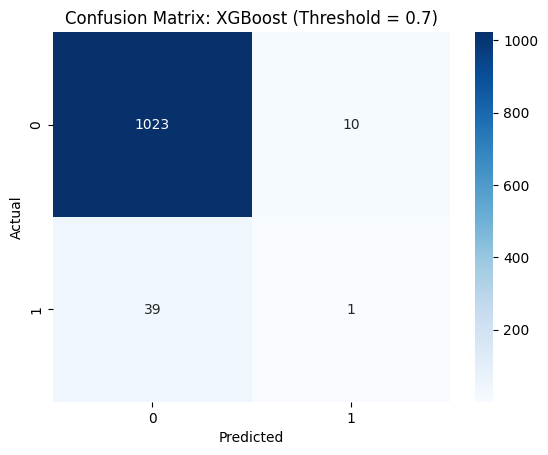

In [45]:
# Define models to compare
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# Define thresholds to test
thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7]

# Store evaluation results
results = []
roc_curves = {}

# Train and evaluate each model at different thresholds
for name, model in models.items():
    print(f"\n=== {name} ===")

    # Train model on balanced training set
    model.fit(X_train_resampled, y_train_resampled)

    # Predict probabilities
    y_proba = model.predict_proba(X_test)[:, 1]

    # ROC AUC (only once per model, independent of threshold)
    auc = roc_auc_score(y_test, y_proba)
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_curves[name] = (fpr, tpr, auc)

    # Evaluate each threshold
    for threshold in thresholds:
        print(f"\n--- Threshold: {threshold} ---")

        # Apply threshold
        y_pred = (y_proba >= threshold).astype(int)

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix: {name} (Threshold = {threshold})')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()

        # Save evaluation metrics
        results.append({
            'Model': name,
            'Threshold': threshold,
            'Accuracy': accuracy_score(y_test, y_pred),
            'Precision': precision_score(y_test, y_pred, zero_division=0),
            'Recall': recall_score(y_test, y_pred),
            'F1-score': f1_score(y_test, y_pred),
            'ROC AUC': auc
        })


## Model Comparison Results

In [46]:
# Convert to summary DataFrame
summary_df = pd.DataFrame(results).sort_values(by='ROC AUC', ascending=False)
print("\n=== Summary Comparison ===")
# print(summary_df.round(3))
summary_df.round(3)


=== Summary Comparison ===


,Model,Threshold,Accuracy,Precision,Recall,F1-score,ROC AUC
0,Logistic Regression,0.1,0.451,0.061,0.950,0.114,0.778
1,Logistic Regression,0.2,0.540,0.067,0.875,0.124,0.778
2,Logistic Regression,0.3,0.613,0.077,0.850,0.141,0.778
3,Logistic Regression,0.4,0.680,0.078,0.700,0.140,0.778
4,Logistic Regression,0.5,0.730,0.083,0.625,0.147,0.778
5,Logistic Regression,0.6,0.791,0.100,0.575,0.170,0.778
6,Logistic Regression,0.7,0.832,0.093,0.400,0.151,0.778
7,Random Forest,0.1,0.750,0.090,0.625,0.157,0.762
8,Random Forest,0.2,0.870,0.109,0.350,0.167,0.762
9,Random Forest,0.3,0.903,0.100,0.200,0.133,0.762


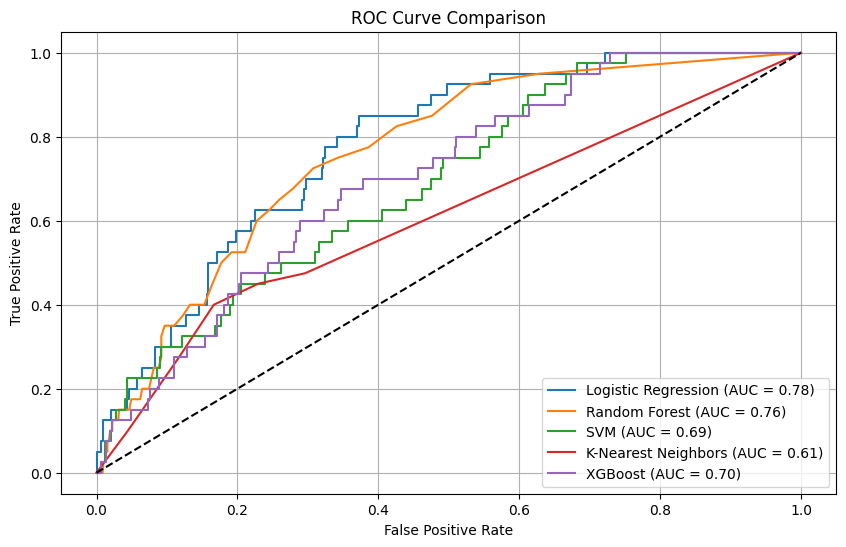

In [47]:
# Plot ROC curves for all models
plt.figure(figsize=(10, 6))
for name, (fpr, tpr, auc) in roc_curves.items():
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid(True)
plt.show()

# Analysis of Results

For this highly imbalanced dataset, where only 3.7% of customers churn, **Recall**, **F1-score**, and **ROC AUC** are the most important evaluation metrics. This is because **identifying churners (the minority class) is more critical than maximizing overall accuracy**. Lowering the decision threshold increases recall by classifying more customers as churners, but also increases false positives, reducing precision.

Let’s examine the models based on these key metrics:

#### Recall  
**Logistic Regression** at a threshold of **0.1** achieves the highest recall at **0.950**, meaning it successfully identifies 95% of actual churners. However, its precision is only **0.061**, so most flagged customers do not actually churn.

#### F1-score  
**SVM** at a threshold of **0.6** has the highest F1-score of **0.171**, indicating a better balance between precision (**0.138**) and recall (**0.225**).  
**Logistic Regression** at threshold **0.6** also performs well with an F1-score of **0.170**, precision of **0.100**, and recall of **0.575**.

#### ROC AUC  
**Logistic Regression** consistently shows the highest **ROC AUC** at **0.778**, indicating strong overall discriminatory power between churners and non-churners, regardless of threshold.


## Business Considerations

The choice of model depends on our business priorities:

- **Maximizing Churn Detection**:  
  If capturing as many potential churners as possible is the top priority (even at the cost of false positives), we use **Logistic Regression with a low threshold (0.1)**. This is suitable if the cost of reaching out to non-churners is low or acceptable.

- **Moderate Trade-off**:  
  If we want to reduce false positives somewhat while still maintaining high recall, we can choose a **Logistic Regression model with a medium threshold (e.g. 0.3)**. This offers a better balance between recall and precision, which may suit a constrained but flexible budget.


- **Balanced Targeting**:  
  If our goal is to minimize false positives and maintain a better balance, we should consider models with higher **F1-scores**, such as **SVM or Logistic Regression at a threshold around 0.6**. These reduce unnecessary interventions but may miss more churners.


## Key Insights on Churn Drivers

Feature analysis shows that customers with:
- **Lower tenure**
- **Higher monthly charges**
- **Lower total charges**

are more likely to churn. In particular, the highest churn rates are associated with:
- **Payment Method**: Electronic Check  
- **Internet Service**: Fiber Optic  
- **Contract Type**: Month-to-Month  

→ This suggests that providing better onboarding, early engagement, or promotional contracts for new customers may reduce churn.

# Final Recommendation

Given both performance and business impact, **Logistic Regression** is the most robust and useful model.  
A **threshold between 0.1 and 0.3** is recommended depending on our budget and tolerance for false positives.